# Numbers Training

In [2]:
from fastai.vision import *

In [3]:
from fastai.metrics import error_rate

In [4]:
path=Path("C:/Users/nishi/Documents/Python Scripts/mnist_png")

In [5]:
classes=[str(i) for i in range(10)]

In [6]:
path.ls()

[WindowsPath('C:/Users/nishi/Documents/Python Scripts/mnist_png/export.pkl'),
 WindowsPath('C:/Users/nishi/Documents/Python Scripts/mnist_png/models'),
 WindowsPath('C:/Users/nishi/Documents/Python Scripts/mnist_png/testing'),
 WindowsPath('C:/Users/nishi/Documents/Python Scripts/mnist_png/training')]

In [7]:
testing=path/'testing'

In [8]:
training=path/'training'

In [10]:
data=ImageDataBunch.from_folder(path,training,testing,valid_pct=0.2,size=28).normalize(imagenet_stats)

In [11]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

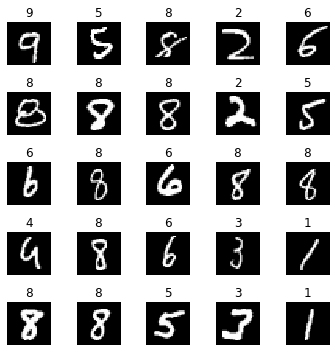

In [19]:
data.show_batch(5,figsize=(5,5))

# Creating Learner

In [12]:
learner=cnn_learner(data,models.resnet34,metrics=error_rate)

In [24]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.116080,0.088336,0.026286,02:04
1,0.110680,0.071073,0.022071,02:04
2,0.089923,0.061847,0.018500,02:22
3,0.065353,0.059331,0.017786,02:11


In [25]:
learner.save('NUMBERS1')

In [26]:
interp = ClassificationInterpretation.from_learner(learner)

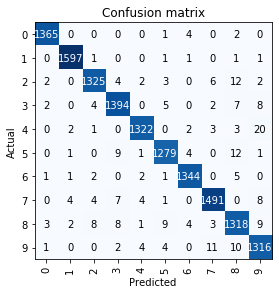

In [27]:
interp.plot_confusion_matrix()

In [28]:
interp.most_confused(10)

[('4', '9', 20),
 ('2', '8', 12),
 ('5', '8', 12),
 ('9', '7', 11),
 ('9', '8', 10)]

In [61]:
learner.unfreeze()

In [62]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.079459,0.042070,0.013929,02:42


In [23]:
learner.load('NUMBERS1')

Learner(data=ImageDataBunch;

Train: LabelList (56000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
0,0,0,0,0
Path: C:\Users\nishi\Documents\Python Scripts\mnist_png;

Valid: LabelList (14000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
0,2,8,1,5
Path: C:\Users\nishi\Documents\Python Scripts\mnist_png;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, aff

In [29]:
learner.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


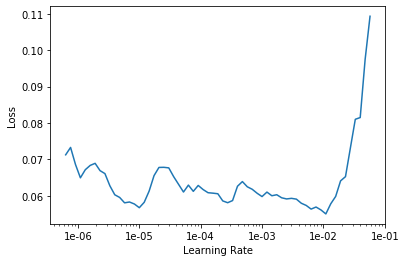

In [30]:
learner.recorder.plot()

In [31]:
learner.fit_one_cycle(2,max_lr=slice(1e-03,1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.113530,0.067239,0.019000,02:03
1,0.055799,0.040249,0.011714,02:07


In [17]:
# learner.unfreeze()

In [13]:
learner.load("NUMBERS1")

Learner(data=ImageDataBunch;

Train: LabelList (56000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
0,0,0,0,0
Path: C:\Users\nishi\Documents\Python Scripts\mnist_png;

Valid: LabelList (14000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
1,3,0,1,3
Path: C:\Users\nishi\Documents\Python Scripts\mnist_png;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, aff

In [44]:
learner.save('Numbers2')

# Expoting and Predicting

In [23]:
img=open_image(path/'testing/8/128.png');img

In [24]:
pred_class,pred_idx,outputs = learner.predict(img)
pred_class

Category 8